> 本节内容你可以了解机器学习和传统编程的差别，了解机器学习中参数、特征、标签等概念，并通过最简单的模型$y=wx$入门机器学习，同时可以直观感受学习率、迭代次数等超参数的作用，明白什么是欠拟合、什么是发散和过拟合。

## 传统编程和机器学习

<div class="alert alert-info">

传统编程和机器学习编程有什么不同？这是第一个问题，以下是把问题发给AI得到的答案：

1. **传统编程**：
   - 传统编程通常是基于明确的指令和逻辑来实现功能。开发者编写代码，告诉计算机如何一步步执行任务。
   - 它依赖于确定性算法，即对于给定的输入，总是产生相同的输出。
   - 在传统编程中，功能实现通常需要开发者对问题有深入的理解，并能够用明确的逻辑和步骤来解决它。

2. **机器学习**：
   - 机器学习是基于数据和算法来实现功能，特别是对于那些难以用传统编程逻辑明确解决的复杂问题。
   - 它依赖于统计模型和算法，这些算法可以从数据中学习，并做出预测或决策，而不需要明确编程每一步。
   - 机器学习模型通过训练数据学习模式和关系，然后可以对新的、未见过的数据做出预测或分类。

两者的主要区别在于：

- **确定性 vs 统计性**：传统编程是确定性的，机器学习是统计性的。
- **显式指令 vs 学习模式**：传统编程需要显式的指令，机器学习通过数据学习隐式的模式。
- **问题解决方式**：传统编程通常解决结构化和定义明确的问题，机器学习解决那些难以用固定算法解决的问题。
- **开发过程**：传统编程的开发过程更侧重于编码和算法设计，机器学习的开发过程更侧重于数据准备、特征工程、模型选择和调参。

总的来说，传统编程和机器学习各有优势和适用场景。在实际应用中，它们经常被结合使用，以解决各种复杂的问题。例如，在机器学习项目中，传统编程用于数据处理、模型实现、训练流程控制等，而机器学习算法用于从数据中学习并做出预测。

</div>

<div class="alert alert-warning">
机器学习编程和传统编程之间最大的区别在于它们的目的。传统编程通常是将确定性的输入映射到确定性输出的过程，这种映射是通过程序员明确编写的规则和逻辑实现的。而机器学习编程的目的是从大量的数据中自动学习输入和输出之间的关系，并通过这个关系来预测新的未知数据的输出。这个关系表现为预测函数，也被称为模型。在传统编程中，我们可以通过追踪代码来理解程序的行为。而在机器学习中，由于模型的复杂性和黑盒特质，很难直接理解模型的行为。
</div>

在开始学习之前，先找AI帮写一个基础的机器学习代码看看。

> 请写一个最基础的机器学习示例代码，不要使用机器学习框架。

ChatGPT：好的，下面是一个不使用机器学习框架的最基础的机器学习示例代码，演示了如何从头实现一个简单的线性回归模型。这段代码通过梯度下降算法来训练模型，最后进行预测。

```python
import numpy as np

# 生成示例数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 初始化模型参数
theta = np.random.randn(2, 1)  # 初始化theta参数

# 添加x0 = 1到每个实例
X_b = np.c_[np.ones((100, 1)), X]  # 添加x0 = 1到每个实例

# 定义超参数
learning_rate = 0.01
n_iterations = 1000

# 梯度下降算法
for iteration in range(n_iterations):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# 输出训练得到的参数
print(f"theta: \n{theta}")

# 使用训练好的模型进行预测
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

print(f"Predictions: \n{y_predict}")

# 画图
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()
```

> 代码说明
1. **生成示例数据**：使用 `numpy` 生成一些线性数据，带有一定的噪声。
2. **初始化模型参数**：随机初始化模型参数 `theta`。
3. **添加偏置项**：在输入数据 `X` 中添加一列全为1的项，作为偏置（截距）项。
4. **定义超参数**：设置学习率和迭代次数。
5. **梯度下降算法**：迭代更新 `theta` 参数，使损失函数（均方误差）最小化。
6. **预测**：使用训练好的模型对新数据进行预测。
7. **画图**：绘制训练数据和预测结果的图形。

这段代码通过简单的梯度下降算法实现了一个基本的线性回归模型，并用生成的示例数据进行了训练和预测。

theta: 
[[4.20607718]
 [2.98273036]]
Predictions: 
[[ 4.20607718]
 [10.17153789]]


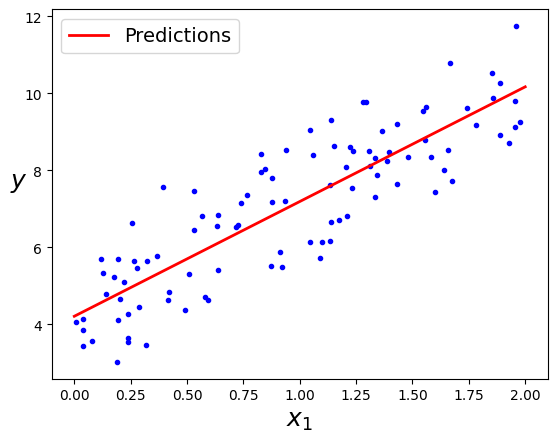

In [1]:
import numpy as np

# 生成示例数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 初始化模型参数
theta = np.random.randn(2, 1)  # 初始化theta参数

# 添加x0 = 1到每个实例
X_b = np.c_[np.ones((100, 1)), X]  # 添加x0 = 1到每个实例

# 定义超参数
learning_rate = 0.01
n_iterations = 1000

# 梯度下降算法
for iteration in range(n_iterations):
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# 输出训练得到的参数
print(f"theta: \n{theta}")

# 使用训练好的模型进行预测
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

print(f"Predictions: \n{y_predict}")

# 画图
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


以上代码是给定一组数据$X$和$y$，使用机器学习得到一个一元一次函数$y=wx+b$，$w$和$b$就是参数$theta$，从数据生成方式我们其实可以知道这个模型是$y=3x+4$。

<div class="alert alert-warning">

**提示**：你可以把以上代码发给chatGPT让它详细解释具体意义来理解。

</div>

我们先看看相关的具体数据：

In [2]:
X

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [3]:
y

array([[ 6.12773118],
       [ 9.19196269],
       [ 8.0822427 ],
       [ 5.73305541],
       [ 8.03018099],
       [ 9.77125385],
       [ 7.80430284],
       [ 9.17071317],
       [ 8.71122394],
       [ 7.35510084],
       [ 8.34717328],
       [ 8.39581459],
       [ 7.61654234],
       [10.53021887],
       [ 4.78258275],
       [ 5.22934897],
       [ 4.13181041],
       [10.78158957],
       [ 8.7958526 ],
       [ 9.62206225],
       [11.75486075],
       [ 7.44719232],
       [ 5.49839118],
       [ 9.65257177],
       [ 3.53652315],
       [ 9.78314731],
       [ 4.44650074],
       [ 8.92055869],
       [ 9.05403196],
       [ 7.96848643],
       [ 7.45489263],
       [ 9.55144679],
       [ 5.87567631],
       [ 9.32066865],
       [ 3.84473543],
       [ 8.50826938],
       [ 8.6198263 ],
       [ 7.54659389],
       [10.27656784],
       [ 9.01312847],
       [ 6.53347293],
       [ 5.52279093],
       [ 8.48402535],
       [ 5.68773873],
       [ 7.30603243],
       [ 7

In [4]:
theta

array([[4.20607718],
       [2.98273036]])

也就是最终得到的函数是：$y=2.98x+4.2$，和 $y=3x+4$ 是比较接近的。

<div class="alert alert-warning">

**提示**：从这里也基本可以看到机器学习和传统编程要解决的问题的差别。在传统编程一般是对函数$y=wx+b$，已知$w$和$b$，写代码也是解决输入$x$求$y$的问题，得到的结果是确定的。而机器学习是根据输入$X$和输出$y$求$w$和$b$（而且这个得到的值还是近似值，根据超参数的不同值可能得到不同的结果），得到一个模型，再用这个模型来预测结果。
</div>

<div class="alert alert-info">

在机器学习中 $y=wx+b$ 是一个常见的线性回归模型，其中：
- `y` 是模型的输出，表示需要预测的目标变量，也是有监督学习中的标签；
- `w` 是模型的权重，表示输入变量（或特征）对目标变量的影响程度，是需要优化学习的模型参数；
- `x` 是模型的输入，表示特征变量；
- `b` 是模型的偏置项，表示模型在没有任何输入时的输出，也是需要优化学习的模型参数。

线性回归模型适用于输入与输出之间存在线性关系的情况，例如预测房屋价格、预测销售额等。模型的训练过程通常是最小化平方误差损失函数，因此优化过程就是寻找最优的权重 `w` 和偏置项 `b`，使得预测值 `y` 与真实值的平方误差最小。

> 在实际应用中， $y=wx+b$ 可能会因为应用场景的不同，而有所调整。例如，当 `y` 表示分类结果时，可能需要将输出通过一个激活函数（如sigmoid函数）转化为概率值，并使用交叉熵损失函数进行优化，这样的模型称为逻辑回归。

</div>

在开始机器学习项目之前，先介绍几个重要概念：

### 模型·参数·特征·标签

在chatGPT火了后，我们听到最多的就是大语言模型，然后各大科技公司都在推自己的大模型，也有很多开源的模型，那什么是模型？在机器学习中，模型指的是用来进行数据预测、分类、聚类等任务的算法或数学模型。模型可以是简单的线性模型，也可以是复杂的深度神经网络模型，其目的是对数据进行建模。

把概念简化，**模型就是预测函数**，只是大模型的函数很复杂，模型通常包括两个基本要素：参数和假设空间。参数指的是模型中待优化的参数，也可以称为模型的权重和偏置等。假设空间指的是模型能够表示的所有可能函数的集合。

以一元一次函数$y=wx+b$为例，这是初中学习的数学知识，但在机器学习中这就是一个常见的线性回归模型，我们对比一下数学概念和机器学习的不同：

示例|数学|机器学习
-|-|-
y=wx+b|函数|模型
x|自变量|特征
y|因变量|标签
w|斜率|参数（权重）
b|截距|参数（偏置）

相对GPT3有1750亿个参数，$y=wx+b$只有2个参数$w$和$b$，虽然没有可比性，但这就是一个完整的模型，当然也是最基础的模型。

<div class="alert alert-success">

> 补充数学基础

一元一次函数是指形如$y = ax + b$的函数，其中a和b是常数，x是自变量，y是因变量。这个函数图像是一条直线，斜率为a，截距为b。

一元一次函数的性质包括：

1. 斜率表示函数的增长速度，斜率为正表示函数单调递增，斜率为负表示函数单调递减，斜率为零表示函数是常数函数。
2. 截距表示函数与y轴的交点，即在x=0时的函数值。
3. 当x取不同的值时，y值的变化量与x的变化量成比例关系，比例系数即为斜率，这被称为函数的线性性。
4. 对于两个一元一次函数f(x)和g(x)，其求和、差、积仍是一元一次函数。
5. 两个一元一次函数的平等与斜率相等且截距相等。

一元一次函数在实际问题中有广泛的应用，例如在经济学、工程学、物理学等领域中使用较多。

</div>

----

以上代码读懂没什么问题，但是做为入门还不够基础，因为你肯定没看明白机器是怎么学习的，那段梯度下降的代码为什么要这样写你肯定也是没搞懂的，而且上来就用矩阵对新手不友好。

我们在初中学物理时都从解决理想状态下的问题开始，在没有摩擦、空气阻力、或其他干扰因素的条件下，使用简化的模型来演示和解释物理现象。所以这里也一样，我们先从最基础的情况下开始。

以上AI给的示例输入`X` 是一个形状为 (100, 1) 的矩阵，包含 100 个随机数，范围在 [0, 2] 之间，输出`y` 是根据 $y = 4 + 3X + \text{噪声} $ 生成的目标值，其中噪声为均值为 0，标准差为 1 的高斯噪声。我们简化数据，也不给噪声，先从一个确定的数据开始模拟学习，而且为了进一步简化，我们直接从一个 $b=0$ 的模型 $y=3x$ 开始:

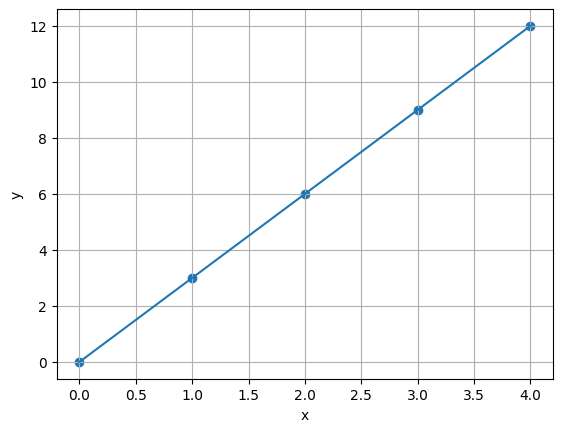

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 绘制图像
plt.plot(X, Y)
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## 解析计算

从几何上也可以看出是一个标准的一元一次函数，那在传统编程上，如果已知 $X$ 和 $Y$ 我们应该怎么得到这个函数？以下是示例代码：

模型: y = 3.0x + 0.0


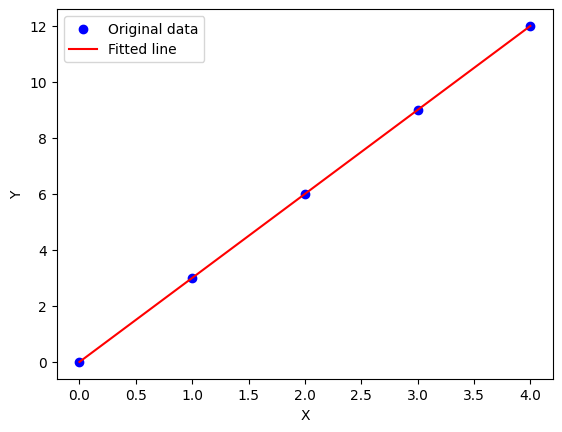

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 计算必要的统计量
n = len(X)
xy = np.sum(X * Y)
x_sum = np.sum(X)
y_sum = np.sum(Y)
x_square_sum = np.sum(X**2)

# 计算斜率 w 和截距 b
w = (n * xy - x_sum * y_sum) / (n * x_square_sum - x_sum**2)
b = (y_sum - w * x_sum) / n

# 输出模型
print(f"模型: y = {w}x + {b}")

# 验证
X_new = np.array([0, 1, 2, 3, 4])
Y_predict = w * X_new + b

# 画图
plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X_new, Y_predict, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


以上求解就是已知函数是$y=wx+b$，直接根据最小二乘法求得$w$和$b$的具体值，这就是传统编程的计算，但这要求数据量不大，而且数据集是确定的。
<div class="alert alert-warning">

**提示**：如果你不知道什么是最小二乘法，记得问AI，在看本教程中有不明白的都养成问AI的好习惯。

</div>
以上数据只有5条，计算没难度，但面对复杂情况，数据一直在更新，怎么算？数据量及其庞大根本算不动，怎么办？下面我们换个角度，用机器学习的方式预测X和Y的关系。

## 机器学习

和计算不同，学习是指利用给定的数据或经验，通过训练和调整模型参数或结构，使模型能够对新的数据或未知情况做出准确的预测或判断。学习是一种能够自主发现模式、调整模型的过程，其结果可以自动优化以最大化预测精度，这样数据量多大都没关系，而且随着数据的增加，学到的结果会更准确。

<div class="alert alert-info">
学习的方式很简单，我们先猜一个 $w$ 值，然后根据特征 $x$ 计算 $wx$ 的结果，对比标签 $y$ 判断误差 $e=y-y_x$，然后根据误差 $e$ 重新调整 $w$，再次计算。
</div>

怎么根据误差 $e$ 调整 $w$ 呢？具体算法如下：

<div class="alert alert-success">
<h3>机器学习基础算法</h3>

<p>在 $x>0$ 时,如果初始化的 $w$ 大了，$e$ 为负数，$w$ 小了，$e$ 为正数，通过 $w=w+e$ 可以调整参数 $w$；而在 $x<0$ 时，如果 $w$ 大了，$e$ 为正数，$w$ 小了，$e$ 为负数，这时 $w=w-e$，和 $x>0$ 时调整方式相反。为了统一计算方式，使用 $w=w+ex$ 可以巧妙的解决问题，但是 $e$ 乘以 $x$ 后存在调整幅度过大可能造成无法收敛的问题，需要通过增加学习率 $a$ 来限制 $w$ 的调整幅度，最终权值调整模型为 $w=w+\alpha \cdot e\cdot x$。</p>

<div class="container">
    <ol class="list-group list-group-flush">
        <li class="list-group-item">建立线性回归模型：$y=wx$</li>
        <li class="list-group-item">初始化权值参数：$w=0$</li>
        <li class="list-group-item">根据权限计算响应：$y_x=wx$</li>
        <li class="list-group-item">根据真实数据计算误差：$e=y-y_x$</li>
        <li class="list-group-item">自适应调整权值：$w=w+a*e*x$($a$为学习率)</li>
        <li class="list-group-item">回到第3步循环计算直到误差趋0</li>
    </ol>
</div>
    
</div>

通过以上方式就实现了最简单的机器学习，下面我们上代码实现验证看看效果。

第 1 次学习结果 0.0
第 2 次学习结果 0.30000000000000004
第 3 次学习结果 1.3800000000000001
第 4 次学习结果 2.838
第 5 次学习结果 3.0972


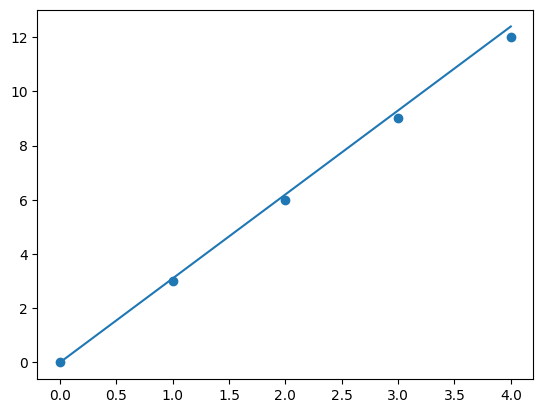

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.1
# 初始化权重w
w = 0

for i in range(n):
    x = X[i]
    y = Y[i]
    y_pre = w * x
    e = y - y_pre
    w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((i + 1), w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

<div class="alert alert-warning">
提示：你可以把以上二种实现方式的代码发给AI问问它这二种方案的区别，可以更好的理解传统编程和机器学习。
</div>

以上示例中我们设置了学习率alpha为0.1，对5条数据学习后得到$w=3.0972$，因为我们知道真实值是3.0，所以能直接知道差距，实际的机器学习是通过测试集来评估模型的效果的，这里先不管了。

下面把alpha设为0.03和0.3试试：


第 1 次学习结果 0.0
第 2 次学习结果 0.09
第 3 次学习结果 0.43920000000000003
第 4 次学习结果 1.1306159999999998
第 5 次学习结果 2.0279203199999998


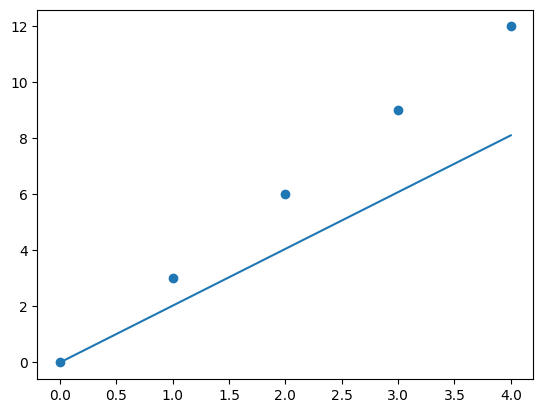

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.03
# 初始化权重w
w = 0

for i in range(n):
    x = X[i]
    y = Y[i]
    y_pre = w * x
    e = y - y_pre
    w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((i + 1), w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

学习率过小，学少了，$w=3$在这里只学到2.02792，这在机器学习中叫欠拟合。

<div class="alert alert-success">
<h3>欠拟合（Underfitting）</h3>

当学习率设得太小时，模型的参数更新速度非常慢，这可能导致模型在训练过程中未能充分学习数据的模式，从而表现为欠拟合。欠拟合的模型在训练集和测试集上的表现都不好，因为它未能捕捉到数据中的规律。
</div>

第 1 次学习结果 0.0
第 2 次学习结果 0.8999999999999999
第 3 次学习结果 3.42
第 4 次学习结果 2.286
第 5 次学习结果 5.7132


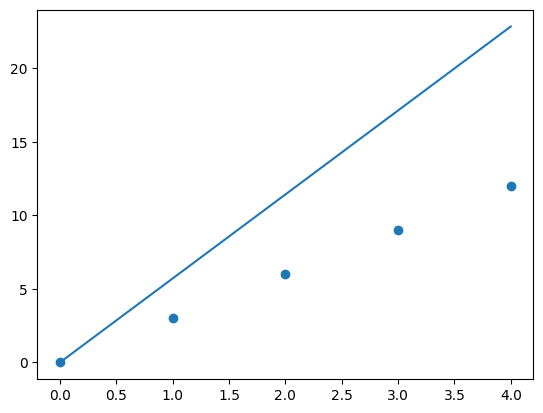

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.3
# 初始化权重w
w = 0

for i in range(n):
    x = X[i]
    y = Y[i]
    y_pre = w * x
    e = y - y_pre
    w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((i + 1), w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

学习率设大了，参数没法收敛到一个稳定值，变的越来越大，这在机器学习中叫发散（注意不是过拟合）

当学习率设得太大时，模型的参数更新幅度过大，可能会导致模型参数在优化过程中震荡，甚至远离最优解。这种情况可能表现为过拟合，或者在更严重的情况下，模型会发散，无法收敛到一个稳定的解。

<div class="alert alert-success">
<h3>过拟合（Overfitting）</h3>

过拟合是机器学习中的一个常见问题，指的是模型在训练数据上表现得很好，但在新数据（即测试数据或验证数据）上表现较差。这是因为模型过于复杂，以至于它不仅捕捉到了训练数据中的实际模式，还拟合了数据中的噪声和偶然性。

过拟合的表现

- **训练误差很低**：模型在训练数据上的误差非常低，几乎能完美地预测训练数据。
- **测试误差很高**：模型在测试数据上的误差很高，预测效果差，因为模型对训练数据的过度拟合导致其无法很好地泛化到未见过的数据。

<h3>发散（Divergence）</h3>

发散指的是模型在训练过程中，模型的参数更新没有收敛到一个稳定的值，甚至可能变得越来越大。这通常是由于训练过程中参数更新过大导致的，通常与过大的学习率有关。
</div>

我们注意到，这里学习率设置太影响结果了，设置的不对直接得到误差极大的结果，你不能保证选择到正合适的学习率，但我们可以确定的是学习率不能选大了让结果发散，而选小一点欠拟合这是因为我们数据集太小了，只训练一轮完全不够学，可以通过增加学习次数（epochs）来解决。

### 多轮训练

下面我们引入学习次数epochs多轮训练，学习率还是设置为0.03看看效果：

第 5 次学习结果 2.0279203199999998
第 10 次学习结果 2.685020365243699
第 15 次学习结果 2.8979382324798593
第 20 次学习结果 2.966929276562929
第 25 次学习结果 2.9892842072479744
第 30 次学习结果 2.996527798536888
第 35 次学习结果 2.998874914504281
第 40 次学习结果 2.9996354424171163
第 45 次学习结果 2.999881873660496
第 50 次学习结果 2.9999617239285654
第 55 次学习结果 2.9999875975362427
第 60 次学习结果 2.9999959812723334
第 65 次学习结果 2.9999986978254984
第 70 次学习结果 2.999999578060876
第 75 次学习结果 2.999999863280517
第 80 次学习结果 2.9999999556992565
第 85 次学习结果 2.9999999856453825
第 90 次学习结果 2.999999995348723
第 95 次学习结果 2.9999999984928625
第 100 次学习结果 2.999999999511647
第 105 次学习结果 2.999999999841761
第 110 次学习结果 2.9999999999487263
第 115 次学习结果 2.999999999983386
第 120 次学习结果 2.9999999999946168
第 125 次学习结果 2.9999999999982556
第 130 次学习结果 2.9999999999994347
第 135 次学习结果 2.9999999999998166
第 140 次学习结果 2.9999999999999405
第 145 次学习结果 2.999999999999981
第 150 次学习结果 2.999999999999994
第 155 次学习结果 2.999999999999998
第 160 次学习结果 2.999999999999999
第 165 次学习结果 2.9999999999999996
第 170 次学习结果 

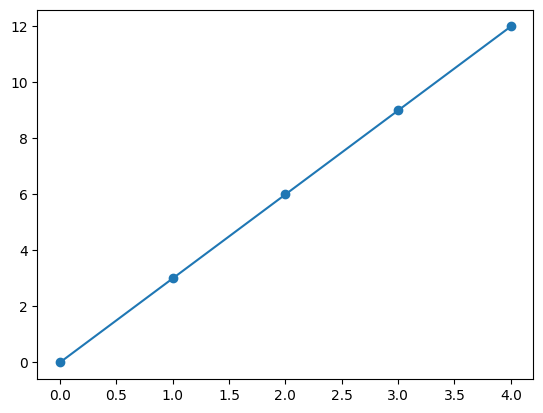

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.03
# 初始化权重w
w = 0
# 设置超参数迭代次数
epochs = 40

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x
        e = y - y_pre
        w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((m + 1) * n, w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

结果很完美，欠拟合的问题解决了。

<div class="alert alert-info">
对简单的模型，如果数据量足够大，一轮训练可能就够了，而对于复杂的模型（如深度神经网络）和大型数据集，多轮训练是必需的。多轮训练有助于模型参数逐渐收敛到一个稳定的值，即找到一个使损失函数最小化的参数组合。如果只进行一轮训练，模型可能无法达到收敛状态，从而导致欠拟合。多轮训练允许模型更好地适应数据的复杂模式和特征。
</div>

下面我们调整不同的学习率和训练轮次看看有什么效果。

第 5 次学习结果 2.7492
第 10 次学习结果 2.97903312
第 15 次学习结果 2.998247168832
第 20 次学习结果 2.999853463314355
第 25 次学习结果 2.99998774953308
第 30 次学习结果 2.9999989758609655
第 35 次学习结果 2.9999999143819767
第 40 次学习结果 2.999999992842333
第 45 次学习结果 2.999999999401619
第 50 次学习结果 2.9999999999499756
第 55 次学习结果 2.999999999995818
第 60 次学习结果 2.9999999999996505
第 65 次学习结果 2.9999999999999707
第 70 次学习结果 2.999999999999998
第 75 次学习结果 3.0
第 80 次学习结果 3.0
第 85 次学习结果 3.0
第 90 次学习结果 3.0
第 95 次学习结果 3.0
第 100 次学习结果 3.0


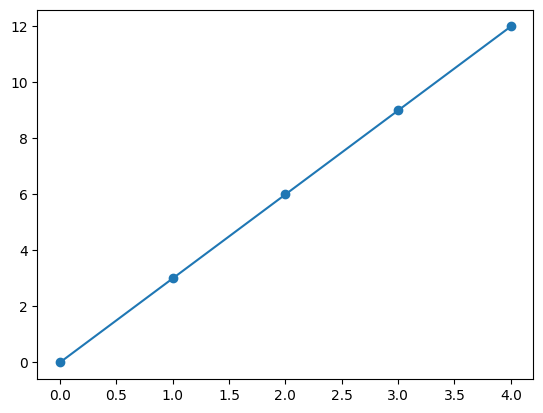

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.05
# 初始化权重w
w = 0
# 设置超参数迭代次数
epochs = 20

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x
        e = y - y_pre
        w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((m + 1) * n, w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

第 5 次学习结果 5.7132
第 10 次学习结果 0.54618192
第 15 次学习结果 5.219233071552001
第 20 次学习结果 0.9929256100883719
第 25 次学习结果 4.815198078236076
第 30 次学习结果 1.3583348580432966
第 35 次学习结果 4.4847219543856465
第 40 次学习结果 1.6572174644536197
第 45 次学习结果 4.214412525148146
第 50 次学习结果 1.9016853122560153
第 55 次学习结果 3.9933158035956615
第 60 次学习结果 2.101645187228082
第 65 次学习结果 3.812472092670921
第 70 次学习结果 2.265200239388422
第 75 次学习结果 3.66455290349711
第 80 次学习结果 2.398978354077216
第 85 次学习结果 3.5435639765725693
第 90 次学习结果 2.5084007395877674
第 95 次学习结果 3.4446023711168268
第 100 次学习结果 2.59790161556194
第 105 次学习结果 3.3636577788857807
第 110 次学习结果 2.671107904775701
第 115 次学习结果 3.297450010920857
第 120 次学习结果 2.7309862101231737
第 125 次学习结果 3.2432960715646013
第 130 次学习结果 2.779963032876973
第 135 次学习结果 3.199001433066069
第 140 次学习结果 2.820023103935045
第 145 次学习结果 3.162771104801145
第 150 次学习结果 2.8527898128178486
第 155 次学习结果 3.133136893287535
第 160 次学习结果 2.879590993710753
第 165 次学习结果 3.1088979052879964
第 170 次学习结果 2.901512734457538
第 175 

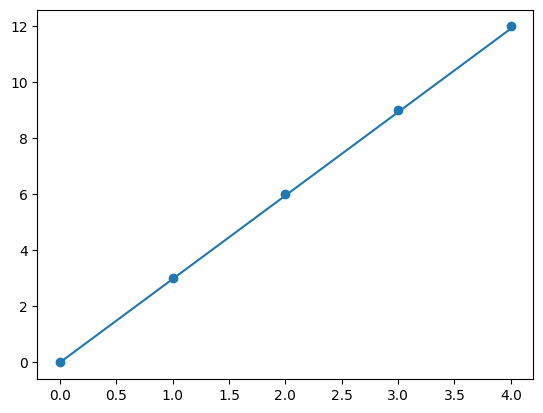

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.3
# 初始化权重w
w = 0
# 设置超参数迭代次数
epochs = 50

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x
        e = y - y_pre
        w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((m + 1) * n, w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

第 5 次学习结果 18.163200000000007
第 10 次学习结果 -73.64087808000005
第 15 次学习结果 390.37365416755244
第 20 次学习结果 -1954.9413976244778
第 25 次学习结果 9899.219000153164
第 30 次学习结果 -50016.44931437414
第 35 次学习结果 252821.30461457273
第 40 次学习结果 -1277841.838843897
第 45 次学习结果 6458741.953452594
第 50 次学习结果 -32645047.166330796


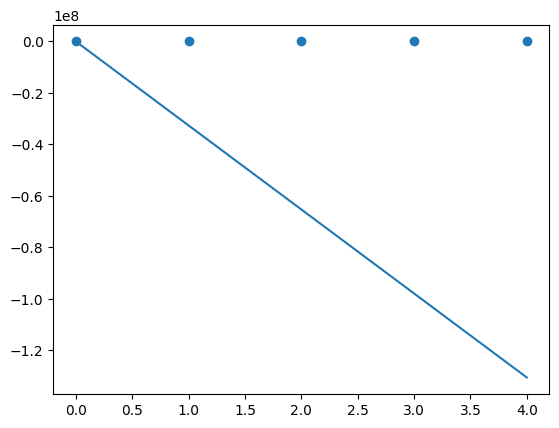

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 给定数据X和Y
X = np.array([0, 1, 2, 3, 4])
Y = np.array([0, 3, 6, 9, 12])

# 获取X的长度作为样本数n
n = len(X)

# 设置超参数学习率
alpha = 0.4
# 初始化权重w
w = 0
# 设置超参数迭代次数
epochs = 10

for m in range(epochs):
    for i in range(n):
        x = X[i]
        y = Y[i]
        y_pre = w * x
        e = y - y_pre
        w = w + alpha * e * x
    print("第 {} 次学习结果 {}".format((m + 1) * n, w))

y_pre = w * X
plt.scatter(X, Y)
plt.plot(X, y_pre)
plt.show()

把学习率设置为0.03时，学习165次就达到极限了，后面继续学习并不会提升准确率，而把学习率设置为0.05时，学习75次就完全拟合了，把学习率设置0.3时结果出现了震荡，但相比只学习一次，都得到了更准确的学习结果。不过，当学习率设置为0.4时结果直接发散了。

从这里可以看出学习率越小学习的越慢，需要更多的学习次数才能有更准确的结果，而学习率大时又可能无法收敛造成学习失败。另外也可以看出，学习次数并不是越多越好，在某些情况下学习一定次数后继续学习并不会有任何效果。

设置适合的学习率和学习次数是非常重要的，即可以提高准确率又能节省学习时间。在这里学习率alpha和学习次数epochs是手动设置的参数，这种参数被称为**超参数**，也就是调参侠们要调整的内容。

<div class="alert alert-success">
<h3>超参数（Hyperparameter）</h3>

在机器学习模型中，超参数（Hyperparameters）是指需要手动设置的模型参数，这些参数不能从训练数据中学习而必须事先确定。通常在训练模型的过程中，超参数被指定为一组值，并进行反复验证，以找到给定问题的最佳模型性能。

超参数的选择通常是一项 trial-and-error 的任务，并需要基于经验、领域知识和分析来完成。需要注意的是，超参数的调整对于机器学习的性能至关重要。不同的超参数设置可能会导致模型性能的巨大变化，因此在实际应用中，需要进行仔细的超参数调整以提高模型的性能。常见的超参数包括：

1. **学习率（Learning Rate）**：学习率指的是每次迭代时模型参数更新的步长。如果学习率过高，模型可能会无法收敛；反之，如果学习率过低，模型则可能会收敛缓慢。选择合适的学习率是非常重要的，可以根据经验或者调参的方式找到最佳学习率。

2. **迭代次数（Number of Iterations）**：迭代次数是指模型在训练集上进行的最大迭代次数，增加迭代次数可以提高模型的准确率，但同时也会增加训练时间。在实际应用中，迭代次数的选择需要考虑模型的时间成本和性能需求之间的权衡。

3. **正则化参数（Regularization Parameters）**：正则化参数是用于控制过拟合的模型参数，例如 L1 正则化和 L2 正则化。在模型训练中，正则化参数可以调整模型复杂度，并帮助避免过度拟合或欠拟合的问题。

4. **批量大小（Batch Size）**：批量大小是指在使用梯度下降算法进行模型训练时每次处理的样本量。通常采用如 32、64、128 等二的幂次方作为批量大小。增加批量大小可以提高训练速度，但同时也会使得每个参数更新的噪声增大。

5. **激活函数（Activation Function）**：激活函数是一种能够给神经元引入非线性因素的函数，在神经网络中扮演着至关重要的角色。不同的激活函数对于输入数据和梯度的变化有着不同的反应，因此选择合适的激活函数也是超参数调优的重要部分。

合理地选择超参数可以提高模型的性能，并获得更好的泛化能力，但需要注意过度调优会导致模型过度拟合训练数据而没有良好的泛化性能。因此，建议在训练模型时进行适当的调优，同时进行可视化、交叉验证和其他实验来验证模型的性能，以确保最终选择的超参数符合该问题的需求。
</div>

### 误差

在上面的机器学习中，最核心的公式是$w = w + \alpha * e * x$，误差$e=y-y_{pre}$，这个误差叫**线性误差**，这种形式可能会使得误差计算结果出现负值，而负值在这里是没有意义的，因为预测结果不能比实际结果更差。

在机器学习中更常用的是**均方误差**$e=(y - y_{pre})^2$，均方误差的优点是确保误差始终为正数，且越大的误差被惩罚得越严厉，在某些场景下能够更好地体现预测结果的差异性。

但是使用均方误差怎么自动调整权重参数$w$实现机器学习呢？我们在下节课中详细讲解。